# 28 - Classifying All-NBA Players (Part X - Gradient Boosted Trees)
Jesus christ... we are on our 10th classifier... I'm going to have to make this my last one because I feel like I'm not doing any analysis anymore haha. NOT THAT THIS ISN'T FUN... but I'd like to actually be able to compare some of these methods together to get a better sense of how they function compared to each other. I'm basically just playing with very very shiny things right now.

<img src="http://static.buzznet.com/uploads/2013/12/msg-138636214527.jpg" style="width: 300px;"/>

Jesus I'm sorry that is scary. While I am extremely excited by the shiny object, I don't quite feel the fear that the cat feels in that photo.

Now... gradient boosted trees... what the hell does that mean exactly. Let's start easy. What is a tree?

<img src="https://static.pexels.com/photos/56875/tree-dawn-nature-bucovina-56875.jpeg" style="width: 500px;"/>

Oh man, what a beautiful photo. Nice wide angle, the glare from the sun peeking through the trees, the contrast from the time of day... perfect. But not the tree we're talking about unfortunately. Turn it up side down though and we get something that we explored in post \#23!

![](https://s3.ca-central-1.amazonaws.com/2017edmfasatb/fas_boto/images/trees/2exampletree.png)

The two photos are pretty much mirror images of each other, right? Well trees make up the base of the classifier we are about to use, but first, we have to explore _**gradient boosting**_. Gradient boosting is essentially an ensemble method that averages a bunch of trees together. Wait, didn't we already do this in bagging and random forests in post \#24? The answer is yes because all 3 are ensemble methods using the basic decision tree as its base learner, however, gradient boosting is a beast that works in a very different fashion. I'm not going to pretend like I've been there since the beginning of gradient boosting or machine learning in general, but the buzz is that gradient boosting, and the _**xgboost**_ library in particular that we're going to use today, is sitting pretty right now with gradient boosting becoming one of the biggest breakthrough concepts in the last decade and xgboost owning all the kaggle competitions right now. It seems that, along with deep learning neural nets, gradient boosting is basically magical.

<img src="https://www.blogmutt.com/hubfs/blog-files/zoolander-blogmutt-so-hot-right-now.jpg" style="width: 400px;"/>

Ok, let's get into gradient boosting. The main explanation I hear about gradient boosting, including how they introduce it in [ESL](http://statweb.stanford.edu/~tibs/ElemStatLearn/download.html), is that _**boosting**_ builds a _**committee**_ of learners by combining multiple _**weak learners**_. In general, the ensemble approach is analagous to the "ask the audience" option in who wants to be a millionaire. How many times have you seen the audience get a question wrong and the phone a friend guy get the answer wrong? The audience (albeit that lifeline is often used in the earlier stages of the game) is almost never wrong! Boosting takes this one step even further by making each of these learners an expert in one section of the data. It's like you can phone 100 friends, each of them being an expert at something. In fact, boosting is even crazier than that, after we've seen the question, we can then, in hindsight, _**pick a specific friend**_ who knows about the subject matter and increase our chances dramatically that way.

Before fully understanding boosting from ESL, I first stumbled upon this video by Alexander Ihler @ UC Irvine who does a beautiful job just visiualizing the steps of boosting.

We start out with a data set and we fit a very simple model. Here, our step function can essentially be seen like a 1 node tree.

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/fas_boto/images/boosting/1boostingsteps.png" style="width: 400px;"/>

On the left hand side, we see our raw data. Here, we only have 1 feature (x axis) and an output (y axis). We "fit" the regression tree
- if $x<0.9$ then $y\approx -48$
- if $x>=0.9$ then $y\approx 5$

On the right hand side, we see the residuals of our first tree against our data. This is where our second learner comes in. In classic boosting, We then fit _**another**_ regression tree to the residuals.

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/fas_boto/images/boosting/2boostingsteps.png" style="width: 400px;"/>

Our model then becomes our original tree plus some weighted version of our second tree.

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/fas_boto/images/boosting/3boostingsteps.png" style="width: 400px;"/>

What do we do with this new model? That's right, we fit another tree to its residuals.

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/fas_boto/images/boosting/4boostingsteps.png" style="width: 400px;"/>

What really ends up happening at the end of the day is that we'll start to build a model that gets closer and closer to the actual shape of the data. Like a neural network of sorts, we're essentially able to use something simple like a tree (depicted by a step function here) and sum more and more of them to build the model or decision boundary. If we took infinite trees, just ilke if we took infinite step functions or sigmoids, we can essentially build any function we want. Along with the neural network, boosting loses a bit of its interpretability because at the end of the day its like hundreds or thousands of trees, and good luck understanding the placement of each, but we'd see something like this:

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/fas_boto/images/boosting/5boostingsteps.png" style="width: 700px;"/>

We see above that our residuals are shrinking more and more because all we've done here is take the latest model, _**find what its weaknesses are**_, and fit a model _**specifically geared towards fixing this weakness**_. In a sense, the newest tree at every iteration is _**trained to be an expert at everything the old model missed**_. Often, single node trees are used for the weak learners, so it takes a few iterations for the trees to start becoming experts at very specific portions of the data or even specific observations themselves, but in general the newest tree is picking up some of the slack of the sum of the previous trees.

_**Gradient**_ boosting is an extension of classic boosting where, instead of fitting the residuals, we define a _**loss function**_, as we always do, descend through the gradient to the hells of uninterpretable statistical accuracy. Amazing.

In the world of classification, there are a few loss functions that are usually used:

<img src="https://s3.ca-central-1.amazonaws.com/2017edmfasatb/fas_boto/images/boosting/6classificationloss.png" style="width: 400px;"/>

This plot is straight out of ESL and does a great job of visualizing how our misclassifications are being penalized.

In the case of misclassification loss, our rule is simple: We penalize a constant amount for wrong classifications, we don't penalize at all for correct classifications. We can see situations where this may not be ideal when our margin _**grossly**_ misclassifies by euclidean distance and we actually want to penalize far away misclassifications more severely than others. A $yf$ value of less than 0 is a misclassification, by the way, and above 0 is a correct classification.

If we look at squared error loss, we see that we'd actually be penalizing _**correct**_ classifications! This means that points _**well within**_ the correct side of the decision boundary will get penalized _**the more correct they are**_!

We then get into some of the more common misclassification loss functions, take deviance, where we don't penalize grossly wrong classifications as much (more robust to outliers) and we also penalize observations less and less the more correct they become.

This brings us to xgboost. This is a gradient boosted trees algorithm that... well... I need to learn more about lol.

In [12]:
# Load libraries & initial config
%load_ext rpy2.ipython

%R library(ggplot2)
%R library(gridExtra)
%R library(scales)
%R library(ggbiplot)
%R library(dplyr)

%matplotlib nbagg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import boto3
from StringIO import StringIO
import warnings
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [13]:
# Retrieve team stats from S3
playerAggDfAllNbaAllStar = pd.read_csv('https://s3.ca-central-1.amazonaws.com/2017edmfasatb/fas_boto/data/playerAggDfAllNbaAllStar.csv', index_col = 0)

pd.set_option('display.max_rows', len(playerAggDfAllNbaAllStar.dtypes))
print playerAggDfAllNbaAllStar.dtypes
pd.reset_option('display.max_rows')

season_start_year          int64
perGameStats_Player       object
perGameStats_Pos          object
perGameStats_Age           int64
perGameStats_Tm           object
perGameStats_G             int64
perGameStats_GS          float64
perGameStats_MP          float64
per100Stats_FG           float64
per100Stats_FGA          float64
per100Stats_FGPerc       float64
per100Stats_3P           float64
per100Stats_3PA          float64
per100Stats_3PPerc       float64
per100Stats_2P           float64
per100Stats_2PA          float64
per100Stats_2PPerc       float64
per100Stats_FT           float64
per100Stats_FTA          float64
per100Stats_FTPerc       float64
per100Stats_ORB          float64
per100Stats_DRB          float64
per100Stats_TRB          float64
per100Stats_AST          float64
per100Stats_STL          float64
per100Stats_BLK          float64
per100Stats_TOV          float64
per100Stats_PF           float64
per100Stats_PTS          float64
per100Stats_ORtg         float64
per100Stat

So xgboost apparently suggests that you download and install from github rather than CRAN because CRAN lags behind by quite a bit, but I'm having a bit of trouble getting the xgboost package to compile right now. I'm on a windows machine unfortunately and there are a few extra steps that has taken me 15 or so minutes now of googling. I just want to get my hands on xgboost to play around at a high level, so I'll just download it from CRAN.

For xgboost, we have to format the data in a _**numeric matrix**_. This can be done simply with the _**data.matrix()**_ function. Our labels also have to be a numeric matrix, so we just have to modify them to be 1 or 0, with 1 indicating all-NBA status.

In [ ]:
# Prepare x and y vars
x = data.matrix(playerAggDfAllNbaAllStar[,c('advancedStats_WS', 'advancedStats_VORP')])
y = data.matrix(ifelse(playerAggDfAllNbaAllStar[,c('accolades_all_nba')] == 'All-NBA', 1, 0))

In [29]:
%%R -i playerAggDfAllNbaAllStar -o gbModel

library(xgboost)

# Build gradient boosted tree model with 10-fold cross validation and 2 iterations of boosted trees
gbModel = xgb.cv(
    data = x,
    label = y,
    nround = 2,
    objective = 'binary:logistic',
    eval_metric = 'auc',
    nfold = 10
)

In [30]:
print gbModel

##### xgb.cv 10-folds

 iter train_auc_mean train_auc_std test_auc_mean test_auc_std

    1      0.9617019   0.002972169     0.9569569  0.014105520

    2      0.9676294   0.004299841     0.9628799  0.008927632



Alright, so I'm basically just following this tutorial here from Tong He, the creator and maintainer of the R package. 

[![IMAGE ALT TEXT](http://img.youtube.com/vi/ufHo8vbk6g4/0.jpg)](http://www.youtube.com/watch?v=ufHo8vbk6g4 "Video Title")

If you watch the video you'll see that he has a cross validation section. I'm just following his lead here and building a quick GBM with 2 iterations, but we see real quick even at 1 iteration we're at 0.957 AUC (note that I'm looking at the _**test_auc_mean**_ metric here). Recall with the neural net we were sitting at almost 0.98. Not bad, and I'm sure the AUC will increase as we increase the number of trees

Real quick though, I just wanted to review (also from the video), that for binary 1-0 classification xgboost seems to default to the log-loss function:

$$L=-\frac{1}{N}\sum_{i=1}^{N}(y_{i}log{p_{i}}+(1-y_{i})log{(1-p_{i})})$$

The xgboost calculation also takes into account a regularization term:

$$\Omega =\gamma T+\frac{1}{2}\lambda \sum_{j=1}^{T}w_{j}^{2}$$

For a total objective to minimize of:

$$Obj=L+\Omega$$

Notice here that the regularization term is essentially controlling the depth of the tree here as $T$ is the number of terminal nodes, and $w_{j}^{2}$ is the value of the $j$th terminal node.

Usually, decision trees use something like the Gini index or cross entroyp as we had described in the decision trees post, but xgboost operations on this objective function by taking the the taylor approximation of the derivative of the $Obj$ function. Taking the taylor approximation and solving for the optimum value of $w_j$ yields

$$w_j=-\frac{\sum_{i\in I_j}g_i}{\sum_{i\in I_j}h_i +\lambda}$$

where
- $g_i$ is the first order term in the taylor approximation of $L$
- $h_i$ is the second order term in the taylor approximation of $L$

If we take this and plug it back int $Obj$ above, we can then come to the following method of measuring node "purity":

$$Obj^{(T)}\approx -\frac{1}{2}\frac{(\sum_{i\in I_j}g_i)^2}{(\sum_{i\in I_j}h_i)+\lambda}+\gamma$$

Okay, so to back up a bit, in _**boosted trees**_, we are iterating to continuously optimize the loss function. With each iteration, we add one tree that becomes an expert catering to the residuals from last iteration's model. How do we know when to stop? This question actually applies two-fold...
- Within each iteration, how do we know when to stop building the tree?
    - The answer here ties directly to the node purity objective defined a few lines ago... A tree in xgboost is grown to it's maximum depth based on certain parameters set by the user, and it is then _**pruned back**_ using the node purity objective function (if the combined purity scores of the observations in the child nodes are worse than that of the parent node, we prune the tree back).
- Among all the iterations, when do we stop adding trees?
    - This can depend on a number of factors, many of which are manual parameters in the xgboost package including _**nround**_ (max number of iterations) and _**early.stop.round**_ (in the xgb.cv function, this sets a threshold for the number of times a test set can regress in accuracy or quality before we decide to stop building trees)

Last but not least, there are quite a few parameters to tune, so I just want to review some here before I go any further:
- General parameters
    - nthread - number of parallel threads to compute with
- Parameters for boosting process
    - eta - step size (between 0 and 1, default 0.3)
    - gamma - minimum loss reduction required to make a split (between 0 and $\infty$, default 0)
    - max_depth - max depth of a tree (between 1 and $\infty$, default 1)
    - min_child_weight - minimum sum of instance weight needed in a child (between 0 and $\infty$, default 1)
    
Ideal way to tune the parameters is to use xgb.cv, use _**early.stop.round**_ to not waste time when the test set error leaves the optimum, and in the case of overfitting reduce the _**eta**_ step size and increase the _**nround**_ max iterations.

That was a mouthful... I felt like it's been a month since I even ran the first model to begin with. In our first model, we got a pretty good AUC of 0.963 on the GBM with only 2 iterations. We saw a pretty good jump from the 1st iteration to the 2nd as well. Let's try this with... I dunno... 50 iterations?

In [89]:
%%R -o gbModelRounds50EvaluationLog

# Build gradient boosted tree model with 10-fold cross validation and 50 iterations of boosted trees
gbModelRounds50 = xgb.cv(
    data = x,
    label = y,
    nround = 50,
    objective = 'binary:logistic',
    eval_metric = 'auc',
    nfold = 10
)

gbModelRounds50EvaluationLog = data.frame(gbModelRounds50['evaluation_log'])

In [90]:
# Print the results dataframe
print gbModelRounds50EvaluationLog

    evaluation_log.iter  evaluation_log.train_auc_mean  \
1                   1.0                       0.962535   
2                   2.0                       0.966369   
3                   3.0                       0.970397   
4                   4.0                       0.972653   
5                   5.0                       0.978120   
6                   6.0                       0.978954   
7                   7.0                       0.979427   
8                   8.0                       0.979769   
9                   9.0                       0.980651   
10                 10.0                       0.981144   
11                 11.0                       0.983244   
12                 12.0                       0.984195   
13                 13.0                       0.984959   
14                 14.0                       0.985310   
15                 15.0                       0.985671   
16                 16.0                       0.986305   
17            

This is probably better to look at in a plot haha.

<IPython.core.display.Javascript object>


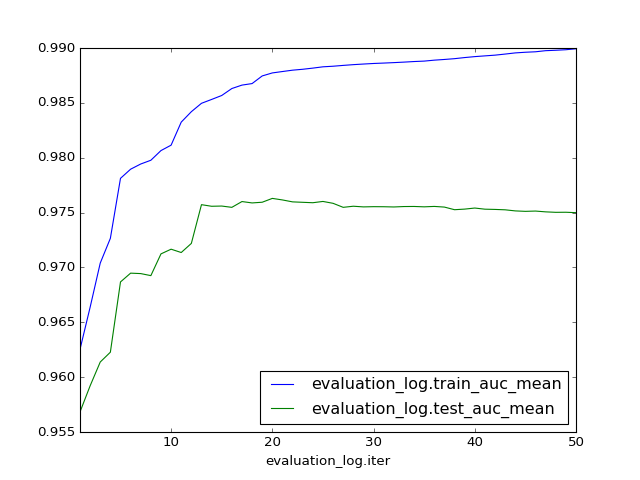

In [97]:
# Plot trainin and test errors
fig, ax = plt.subplots(1, 1)

gbModelRounds50EvaluationLog.plot(
    kind = 'line',
    x = 'evaluation_log.iter',
    y = 'evaluation_log.train_auc_mean',
    ax = ax
)

gbModelRounds50EvaluationLog.plot(
    kind = 'line',
    x = 'evaluation_log.iter',
    y = 'evaluation_log.test_auc_mean',
    ax = ax
)

Awesome, this makes way more sense. We're looking for something that can match an AUC of 0.979, and we got... pretty close actually! At about the 19th iteration we peak at a value of 0.976, only slightly off from what we had before!

I kind of just want to do like 1000 iterations and just see what happens.

In [98]:
%%R -o gbModelRounds1000EvaluationLog

# Build gradient boosted tree model with 10-fold cross validation and 50 iterations of boosted trees
gbModelRounds1000 = xgb.cv(
    data = x,
    label = y,
    nround = 1000,
    objective = 'binary:logistic',
    eval_metric = 'auc',
    nfold = 10
)

gbModelRounds1000EvaluationLog = data.frame(gbModelRounds1000['evaluation_log'])

<IPython.core.display.Javascript object>


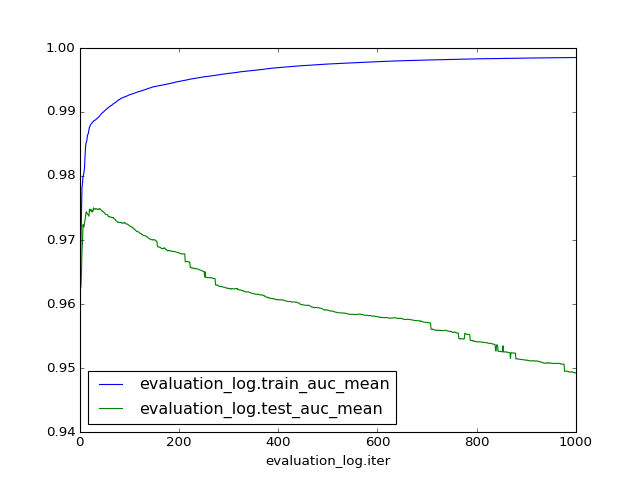

In [99]:
# Plot trainin and test errors
fig1, ax1 = plt.subplots(1, 1)

gbModelRounds1000EvaluationLog.plot(
    kind = 'line',
    x = 'evaluation_log.iter',
    y = 'evaluation_log.train_auc_mean',
    ax = ax1
)

gbModelRounds1000EvaluationLog.plot(
    kind = 'line',
    x = 'evaluation_log.iter',
    y = 'evaluation_log.test_auc_mean',
    ax = ax1
)

Okay! Simple enough. 20 was obviously the best choice. I could've theoretically saved myself the time of the other... what... 980 iterations if I possibly had used the _**early.stop.round**_ option?

In [100]:
%%R -o gbModelRounds1000EarlyStopEvaluationLog

# Build gradient boosted tree model with 10-fold cross validation and 50 iterations of boosted trees
gbModelRounds1000EarlyStop = xgb.cv(
    data = x,
    label = y,
    nround = 1000,
    objective = 'binary:logistic',
    eval_metric = 'auc',
    nfold = 10,
    early.stop.round = 10
)

gbModelRounds1000EarlyStopEvaluationLog = data.frame(gbModelRounds1000EarlyStop['evaluation_log'])

<IPython.core.display.Javascript object>


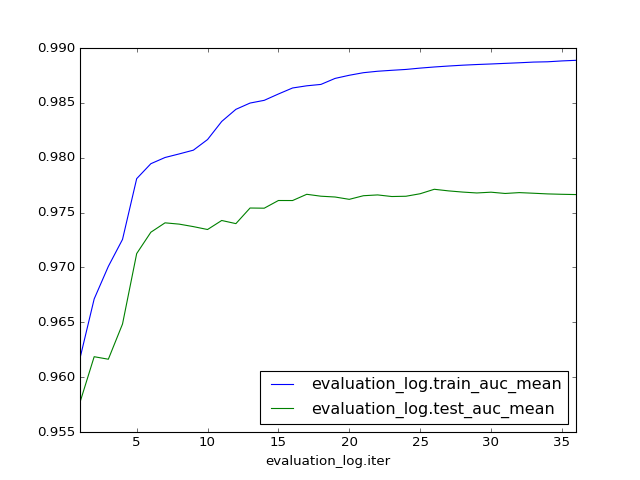

In [101]:
# Plot trainin and test errors
fig1, ax2 = plt.subplots(1, 1)

gbModelRounds1000EarlyStopEvaluationLog.plot(
    kind = 'line',
    x = 'evaluation_log.iter',
    y = 'evaluation_log.train_auc_mean',
    ax = ax2
)

gbModelRounds1000EarlyStopEvaluationLog.plot(
    kind = 'line',
    x = 'evaluation_log.iter',
    y = 'evaluation_log.test_auc_mean',
    ax = ax2
)

Nice, that only took like 5 seconds! Funny enough though, the best iteration here is actually the 26th iteration and we've gotten up to 0.979. What If I keep my early stop mechanism and I decrease my step size? Also, just looking at the data a bit, I'm not 100% sure if an early stop threshold of 10 continuously decreasing iterations are enough... I'm seeing decreases of 8 and then the model jumps to another maximum AUC... that's not too far off from 10 and I wonder if I'm cutting off the iterations prematurely in some of these iterations. I'll try and early stop threshold of 20 iterations.

In [116]:
%%R -o gbModelRounds1000EarlyStopSmallEtaEvaluationLog

# Build gradient boosted tree model with 10-fold cross validation and 50 iterations of boosted trees
gbModelRounds1000SmallEtaEarlyStop = xgb.cv(
    data = x,
    label = y,
    nround = 1000,
    objective = 'binary:logistic',
    eval_metric = 'auc',
    nfold = 10,
    early.stop.round = 20,
    eta = 0.1
)

gbModelRounds1000EarlyStopSmallEtaEvaluationLog = data.frame(gbModelRounds1000SmallEtaEarlyStop['evaluation_log'])

<IPython.core.display.Javascript object>


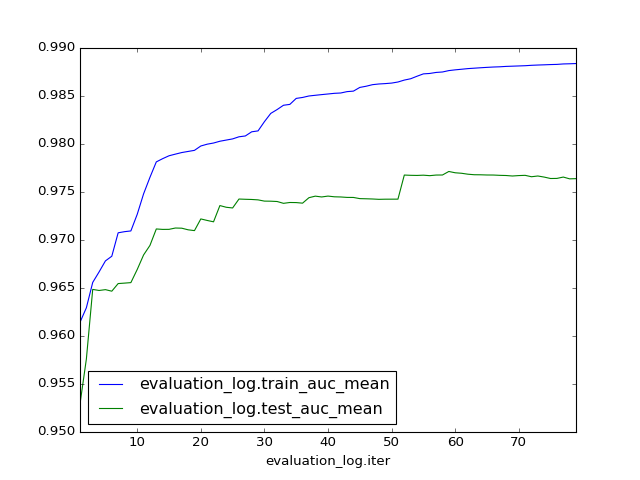

In [117]:
# Plot trainin and test errors
fig1, ax3 = plt.subplots(1, 1)

gbModelRounds1000EarlyStopSmallEtaEvaluationLog.plot(
    kind = 'line',
    x = 'evaluation_log.iter',
    y = 'evaluation_log.train_auc_mean',
    ax = ax3
)

gbModelRounds1000EarlyStopSmallEtaEvaluationLog.plot(
    kind = 'line',
    x = 'evaluation_log.iter',
    y = 'evaluation_log.test_auc_mean',
    ax = ax3
)

Obviously took us a bit longer to climb to max (59th iteration here), but we're getting to around the same accuracy. I've also ready that sometimes the best performing trees are just simply tree roots (each iteration only makes one split). Let's try that out with the current options. I'm going to cut down the variable names a bit because they're getting out of hand (and I'm probably also butchering best practices anyways).

In [136]:
%%R -o gbModelMaxDepth1EvaluationLog

# Build gradient boosted tree model with 10-fold cross validation and 50 iterations of boosted trees
gbModelMaxDepth1 = xgb.cv(
    data = x,
    label = y,
    nround = 1000,
    objective = 'binary:logistic',
    eval_metric = 'auc',
    nfold = 10,
    early.stop.round = 20,
    eta = 0.1,
    max_depth = 1
)

gbModelMaxDepth1EvaluationLog = data.frame(gbModelMaxDepth1['evaluation_log'])

<IPython.core.display.Javascript object>


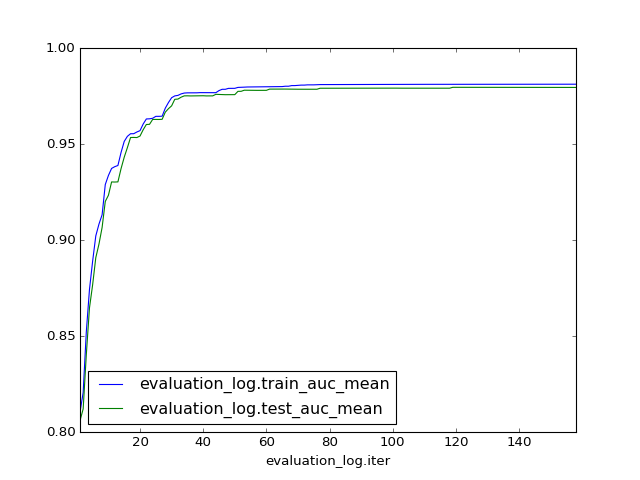

In [121]:
# Plot trainin and test errors
fig1, ax4 = plt.subplots(1, 1)

gbModelMaxDepth1EvaluationLog.plot(
    kind = 'line',
    x = 'evaluation_log.iter',
    y = 'evaluation_log.train_auc_mean',
    ax = ax4
)

gbModelMaxDepth1EvaluationLog.plot(
    kind = 'line',
    x = 'evaluation_log.iter',
    y = 'evaluation_log.test_auc_mean',
    ax = ax4
)

Here, the max AUC is... _**0.9796**_! With the neural network, we were seeing 0.9797. We're basically getting the same results! If I ran this a few more times, I'm sure we'd see something maybe equivalent!

--2 seconds later--

Yup just ran another one and got _**0.9799**_!

--2 seconds later--

Just ran another and got _**0.98**_!

-- 5 minutes later--

Okay I don't think I can beat 0.98 lol. But how cool is that, I see why xgboost, or gradient boosting in general is the beez kneez! The unfortunate thing right now is that I think I'm getting super super caught up in a kaggle-crazed accuracy prediction mode. All I'm caring about, and all I'm getting excited over is that one AUC number. It's like cocaine to me right now. I need more AUC, all of the AUC in fact. The downside to thid mindset is... well... this frickin model is an aggregate of, on this last model, over 100 trees. How the hell am I supposed to explain this to someone else?

_**"TRUST ME MAN!!! THE AUC WAS 0.98!"**_

_**"Wait, what? I thought we were looking at WS and VORP? What's AUC?"**_

_**"AUC IS AREA UNDER THE CURVE. IT WAS 0.98, AND IT WAS GLORIOUS"**_

_**"What curve? What are you talking about?"**_

_**"AREA UNDER THE CURVE OF THE SENSITIVITY AND SPECIFICITY TRADE OFF PLOT OF THE AGGREGATED BOOSTED TREES STEMMING FROM WS AND VORP"**_

_**"Boosted... what? Trees? Trees have sensitive curves? I gotta go man... My... mom is calling me..."**_

_**"NO COME ON LET ME SHOW YOU THIS CHAPTER IN ESL I SWEAR IT WILL MAKE SENSE AFTER"**_

_**"The all-NBA teams have already been released man... Bye"**_

If I've learned anything in consulting so far, it's that _**some**_ people just do not have the time of day. Through no fault of their own, they simply won't get the message unless it's simple and relatable to them. So when I've gone through and tuned not even like 1/3 of the parameters that I should have probably played around with to really get a feel for the model, how can I expect someone else to pick it up in one conversation? Contrast this to the decision tree which literally gave me a picture of a frickin tree that I can put into a slide or something and had an AUC of 0.971 anyways, it's pretty easy to say which model I'd go with _**in the business world**_. In the data science / Kaggle world, of course I'd pick the boosted tree. A higher accuracy is objective... it's simply the best I've seen, and that works for me because interpretability is not an issue I have to worry about. The flip side is me banging my head on a desk 80 times because I lost a battle with an executive who would rather do 1000 other tasks of higher priority than listening to me sit here and justify the 0.09 AUC difference (again, what's AUC again?), so if I can save that and take the 0.09 AUC hit, I'll probably do it.

Another thing I've noticed about boosted trees is that the results are slightly different every time! The aggregate trees will change because, like random forest, _**each iteration takes only a subset of the data and only a subset of the columns**_ to average a variety of models together and decrease variance.

Like the random forest as well, it seems that xgboost also gives us a matrix of feature importance:

In [162]:
%%R -o gbModelFinal

# Build gradient boosted tree model with 10-fold cross validation and 50 iterations of boosted trees
gbModelFinal = xgboost(
    data = x,
    label = y,
    nround = 120,
    objective = 'binary:logistic',
    eval_metric = 'auc',
    eta = 0.1,
    max_depth = 1
)

gbModelFinalEvaluationLog = data.frame(gbModelFinal['evaluation_log'])

In [163]:
%R print(data.frame(xgb.importance(names(data.frame(x)), model = gbModelFinal)))

,Feature,Gain,Cover,Frequency
1,advancedStats_WS,0.868319,0.816707,0.708333
2,advancedStats_VORP,0.131681,0.183293,0.291667


Interestingly enough, it's giving me the idea that our decision tree gave us (remember when our first shallow tree were all WS splits?), but these two deviate a bit from what random forest told us for feature importance (both features were ranked more evenly, although WS was still more important). Won't quite go into too much analysis as to why they're different (because I don't know the mechanisms of each model by heart yet), but something I'll definitely keep in the back of my mind! Let's just check the ROC from the ROCR package because I want to see the sensitivity and specificity values of the best value.

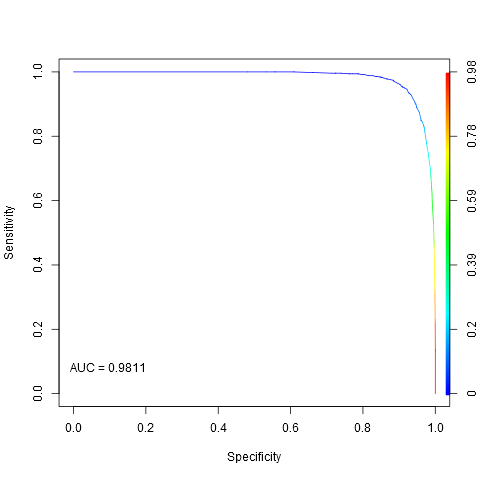

In [164]:
%%R
library(ROCR)

# Use the tree library to predict probabilities
gbModelFinalPred = predict(gbModelFinal, x)

# Use the ROCR library to build the ROC curve
gbModelFinalPredObj = prediction(gbModelFinalPred, ifelse(playerAggDfAllNbaAllStar['accolades_all_nba'] == 'All-NBA', TRUE, FALSE))

# Run performance evaluation for the metric 'total accuracy'
gbModelFinalRocEval = performance(gbModelFinalPredObj, 'sens', 'spec')
plot(gbModelFinalRocEval, colorize = T)
text(
    0.2, 
    0.08, 
    labels = paste("AUC = ", round(performance(gbModelFinalPredObj, 'auc')@y.values[[1]], digits = 4), sep= ""), 
    adj = 1
)

In [165]:
# Retrieve the iterative cut-off sensitivity analysis that logistic regression did behind the scenes
%R cutoffs = data.frame(cut = gbModelFinalRocEval@alpha.values[[1]], sens = gbModelFinalRocEval@x.values[[1]], spec = gbModelFinalRocEval@y.values[[1]])

# Calculate the metrics sensitivity + specificity. This will help us gauge the accuracy of both classes simultaneously.
#   E.g. if we were guessing each class 100% correctly (there is a very distinct decision boundary), then we would have 1 + 1 = 2
%R cutoffs['sens_plus_spec'] = cutoffs['sens'] + cutoffs['spec']

# See the last few rows of this dataframe where the sensitivity + specificity are at its max
%R tail(cutoffs[order(cutoffs$sens_plus_spec),])

,cut,sens,spec,sens_plus_spec
80,0.037327,0.910599,0.952191,1.862790
84,0.024009,0.903365,0.960159,1.863525
82,0.036516,0.909498,0.954183,1.863682
79,0.040817,0.914688,0.950199,1.864887
78,0.046209,0.914766,0.950199,1.864966
77,0.047340,0.921607,0.946215,1.867822


95% / 92%. Definitely the best we've seen so far considering both, as noted by the AUC. Also, note now the AUC on the training data is actually 0.9811 now on the ROC plot. This is because I had to use xgboost instead of xgb.cv in order to get the feature importances and predictions. 0.9811 was higher than what we saw before (0.98) because we were looking at the AUC metrics for the _**test set**_ earlier. As we get further, gradient boosting can basically fit our data 100% (unless there's an overlap of a data point) because, with more iterations, we fit trees specifically geared for certain observations or even single observations, so we'll always be able to pick out all the spatial intricacies. This value of _**nrounds**_ is what cross validation chose for us, so we'll go ahead with this model. Even though the model is probabyl slightly overfitting a bit, it's actually quite interesting to see how flexible the GBM is compared to other models. With certain models, it would be basically _**impossible**_ to achieve this AUC even on the training data becauese the models and the boundaries they produce are way too rigid. Cool stuff.

![](https://afrofantasy.files.wordpress.com/2014/02/steve-urkel-tgif-universe.jpg)